In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import drnb as nb

time: 6.59 s (started: 2022-09-04 14:56:46 -07:00)


[14:56:53] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=516934;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=122084;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=890709;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=637438;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:56:54] INFO     Automatically determined negative gradient method `bh`                               ]8;id=373692;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=647451;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

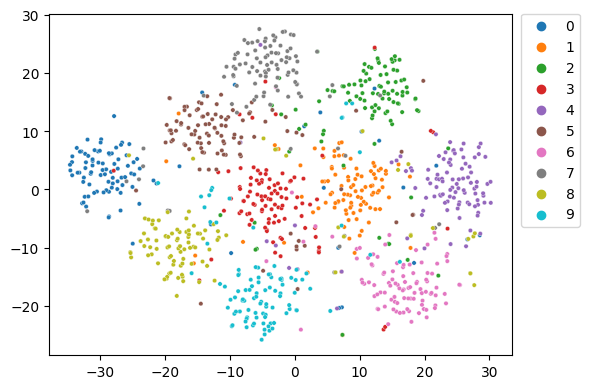

time: 4.12 s (started: 2022-09-04 14:56:52 -07:00)


In [2]:
s1k_tsne = nb.embed_data("s1k", method="tsne")

Parameters:

* `perplexity=30`
* `learning_rate="auto"`: `"auto"` means use the method of Belkina and co-workers which scaled the learning rate with the size of the dataset.
* `early_exaggeration_iter=250`
* `early_exaggeration=12`
* `n_iter=500`
* `exaggeration=None`: amount of exaggeration to apply during the non-early part of the iteration. Can give a more UMAP-like appearance.
* `dof=1`: degrees of freedom in the heavy-tail parameterization: `100` for SNE-like behavior. `0.5` gives noticeably compressed clusters.
* `theta=0.5`: amount of approximation when using Barnes-Hut (`negative_gradient_method="bh"`). `0` is exact t-SNE. Typical values 0.2-0.8. Can be set to `"auto"`.
* `n_interpolation_points=3`: an FFT setting. Don't touch it.
* `min_num_intervals=50`: another FFT setting. The higher the value, the more accurate the gradient calculation.
* `ints_in_interval=1`: grid size length in FFT. Lower is more accurate.
* `initialization="pca"`: one of `"pca"`, `"spectral"` or `"random"`. Or a matrix.
* `metric="euclidean"`: metric to use with one of the nearest neighbor methods.
* `metric_params=None`
* `initial_momentum=0.5`
* `final_momentum=0.8`
* `max_grad_norm=None`: clips the gradient norm.
* `max_step_norm=5`: clips the update step size.
* `n_jobs=1`: `-1` means use all processors.
* `neighbors="auto"`: one of: `"exact"`, `"annoy"`, `"pynndescent"`", `"hnsw"`, `"approx"` (`"annoy"` if possible, `"pynndescent"` otherwise) or `"auto"` (`"exact"` if `N < 1000` and `"approx"` otherwise).
* `negative_gradient_method="auto"`: one of: `"bh"` (Barnes-Hut), `"fft"` (FFT interpolation) or `"auto"` (BH if `N < 10000`, FFT otherwise).
* `callbacks=None`: one or a list of functors that implement `def callback(iteration, error, embedding):`
* `callbacks_every_iters=50`: number of iterations between the `callbacks` being called.
* `random_state=None`
* `verbose=False`

[14:56:57] INFO     Precomputed initialization provided. Ignoring initalization-related parameters.    ]8;id=705951;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=679133;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#1329\1329]8;;\

           INFO     Automatically determined negative gradient method `bh`                               ]8;id=141802;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=140466;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

[14:56:59] INFO     Automatically determined negative gradient method `bh`                               ]8;id=79483;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py\tsne.py]8;;\:]8;id=540956;file:///home/james/dev/drnb/venv/lib/python3.10/site-packages/openTSNE/tsne.py#53\53]8;;\

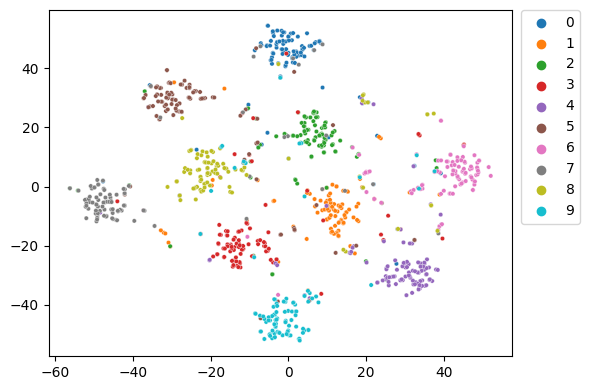

time: 7.26 s (started: 2022-09-04 14:56:56 -07:00)


In [3]:
s1k_tsne = nb.embed_data(
    "s1k", method=nb.embedder("tsne", params=dict(dof=0.7, initialization="spectral"))
)